<a href="https://colab.research.google.com/github/MicroprocessorX069/Project-Rhymer/blob/master/Project_Rhymer_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#To copy


In [0]:
# from __future__ import absolute_import, division, print_function, unicode_literals
# !pip install tensorflow-gpu==2.0
# import tensorflow as tf
# import numpy as np
# import os
# import datetime
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# print("Tensorflow version: ",tf.__version__)

In [0]:
!pip install tensorflow --upgrade --force-reinstall

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import os
import datetime
import pandas as pd


http://biobank.ctsu.ox.ac.uk/crystal/field.cgi?id=41202

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#paths
root_dir="/content/drive/My Drive/Projects/Project Rhymer"
dataset_path="/content/drive/My Drive/Projects/Project Rhymer/Dataset/complete-poetryfoundationorg-dataset/kaggle_poem_dataset.csv"
version="lstm-1"
ckpt_dir="/content/drive/My Drive/Projects/Project Rhymer/src/lstm-1/checkpoints"

In [0]:
dataset=pd.read_csv(dataset_path,dtype=str, encoding='utf-8')


In [57]:
dataset

,Unnamed: 0,Author,Title,Poetry Foundation ID,Content
0,0,Wendy Videlock,!,55489,"Dear Writers, I’m compiling the first in what ..."
1,1,Hailey Leithauser,0,41729,"Philosophic\nin its complex, ovoid emptiness,\..."
2,2,Jody Gladding,1-800-FEAR,57135,We'd like to talk with you about fear t...
3,3,Joseph Brodsky,1 January 1965,56736,The Wise Men will unlearn your name.\nAbove yo...
4,4,Ted Berrigan,3 Pages,51624,For Jack Collom\n10 Things I do Every Day\n\np...
...,...,...,...,...,...
15647,15647,Hannah Gamble,Your Invitation to a Modest Breakfast,56059,"It’s too cold to smoke outside, but if you com..."
15648,15648,Eleni Sikelianos,Your Kingdom\n \n \n \n Launch Audio in a N...,145220,if you like let the body feel\nall its own evo...
15649,15649,Susan Elizabeth Howe,“Your Luck Is About To Change”,41696,(A fortune cookie)\nOminous inscrutable Chines...
15650,15650,Andrew Shields,Your Mileage May Vary,90177,1\nOur last night in the house was not our las...


In [65]:
dataset['Content'].replace('\n',' ')
temp=dataset['Content']
temp[1]

'Philosophic\nin its complex, ovoid emptiness,\na skillful pundit coined it as a sort\nof stopgap doorstop for those\nquaint equations\n\nRomans never\ndreamt of. In form completely clever\nand discrete—a mirror come unsilvered,\nloose watch face without the works,\na hollowed globe\n\nfrom tip to toe\nunbroken, it evades the grappling\nhooks of mass, tilts the thin rim of no thing,\nremains embryonic sum,\nnon-cogito.'

In [8]:
text=open(dataset_path).read()
print("Text is {} characters long".format(len(text)))

Text is 23132050 characters long


In [13]:
text[0:800]

',Author,Title,Poetry Foundation ID,Content\n0,Wendy Videlock,!,55489,"Dear Writers, I’m compiling the first in what I hope is a series of publications I’m calling artists among artists. The theme for issue 1 is “Faggot Dinosaur.” I hope to hear from you! Thank you and best wishes."\n1,Hailey Leithauser,0,41729,"Philosophic\nin its complex, ovoid emptiness,\na skillful pundit coined it as a sort\nof stopgap doorstop for those\nquaint equations\n\nRomans never\ndreamt of. In form completely clever\nand discrete—a mirror come unsilvered,\nloose watch face without the works,\na hollowed globe\n\nfrom tip to toe\nunbroken, it evades the grappling\nhooks of mass, tilts the thin rim of no thing,\nremains embryonic sum,\nnon-cogito."\n2,Jody Gladding,1-800-FEAR,57135,"We\'d \xa0like \xa0to \xa0talk \xa0with \xa0you \xa0about \xa0fear the'

In [17]:
histories=[h for h in text.split('\n')][1:]
print("Data has {} poem contents".format(len(histories)))
n_patients=len(histories)

Data has 699551 poem contents


In [28]:
histories

'a skillful pundit coined it as a sort'

In [26]:
temp=[symptom for symptom in histories[2].split(',')][-1]
temp

''

In [0]:
n_patients=len(histories)

real_data=[]
for history in histories:
  real_data.append([symptom for symptom in history.split(',')])
for history in real_data:
  while "" in history:
    history.remove("")
  history.append("End")

real_data[0]

['H269', 'D259', 'F067', 'End']

Splitting each symptom in to 3 levels
e.g. A423 as A, 42, 3

Splitting one history into multiple sub histories
H, 20, 4, G,12,6 into
[H],[H,20],[H,20,4],[H,20,4,G]

Min length has to be 4.
i.e. One whole symptom has to be there (Not split, whole with all 3 levels) 


In [0]:
data=[]
for history in real_data:
  hist=[]
  for s in history:
    if s!="End":
      try:
        hist.extend([s[0],s[1:3],s[3]])
      except:
        hist.extend([s[0],s[1:3],'0'])
    else:
      hist.append(s)
  data.append(hist)
data[0]

#Splitting one history into multiple sub histories H, 20, 4, G,12,6 into [H],[H,20],[H,20,4],[H,20,4,G]
#Min length has to be 4. i.e. One whole symptom has to be there (Not split, whole with all 3 levels)

aug_data=[]
for history in data:
  n_sym=len(history)
  for i in range(4,n_sym+1):
    try:
      aug_data.append(history[:i])
    except:
      print(history)

Combining all histories to one

In [0]:
text=[]
for history in data:
  text.extend(history)


Each characted mapped as a no.

In [0]:
vocab=sorted(set(text))
print("There are {} unique characters".format(len(vocab)))
char2int={c:i for i,c in enumerate(vocab)}
int2char=np.array(vocab)
print("Vector:\n")
for char,_ in zip(char2int,range(8)):
  print(' {:4s}: {:3d},'.format(repr(char), char2int[char]))

There are 132 unique characters
Vector:

 '0' :   0,
 '00':   1,
 '01':   2,
 '02':   3,
 '03':   4,
 '04':   5,
 '05':   6,
 '06':   7,


##Data analysis

In [0]:
def flatten2D(grid):
  a=[]
  for x in grid:
    a.extend(x)
  return a

In [0]:

from collections import Counter
import operator
def get_top10(aug_data):
  flatten_aug_data=flatten2D(aug_data)
  counter_levels=Counter(flatten_aug_data)
  percent_levels=sorted([[i, (counter_levels[i] / len(flatten_aug_data) * 100.0)] for i in counter_levels],reverse=True,key=operator.itemgetter(1))
  return percent_levels[1:10]

In [0]:
print("Top 10 Symptoms")
print(get_top10(real_data))
print("Top 10 symptoms levels")
a=get_top10(aug_data)


Top 10 Symptoms
[['R074', 1.533902411749357], ['F329', 1.2412867633354456], ['F103', 1.0008573452119134], ['R104', 0.926305587654229], ['R55', 0.892757296753271], ['F102', 0.8834383270585604], ['F100', 0.8815745331196183], ['T391', 0.8032951876840496], ['R073', 0.6989227271032915]]
Top 10 symptoms levels


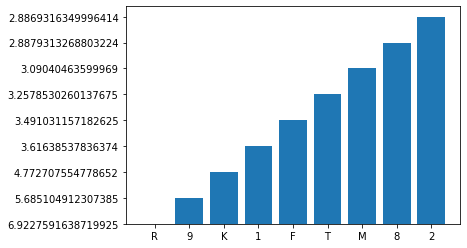

In [0]:
import matplotlib.pyplot as plt
top10_levels=np.array(get_top10(aug_data))
#top10_levels[:,1].astype(int)
y_pos = np.arange(len(top10_levels[:,0]))
 
# Create bars
plt.bar(y_pos, top10_levels[:,1])
 
# Create names on the x-axis
plt.xticks(y_pos, top10_levels[:,0])
 
# Show graphic
plt.show()

#plt.bar(top10_levels[:,0],top10_levels[:,1])
top10_symptoms=np.array(get_top10(real_data))
#plt.bar(top10_symptoms[:,0],top10_symptoms[:,1])

Mapping each of the level codes in histories to nos.

In [0]:
int_data=[]
for history in aug_data:
  int_data.append(np.array([char2int[level_code] for level_code in history],dtype=np.int32))
int_data=np.array(int_data)
print ('{}\n mapped to integers:\n {}'.format(repr(aug_data[0]), int_data[0]))

['H', '26', '9', 'D']
 mapped to integers:
 [118  29  99 113]


Creating training and validation sets

In [0]:
n_split_histories=len(aug_data) #length of all split histories

In [0]:
tr_split=0.8
n_tr_samples=int(tr_split*n_split_histories)
tr_data=int_data[:n_tr_samples]
val_data=int_data[n_tr_samples:]
print("Total size: {}, Train size : {}, Test size:{}" \
.format(int_data.shape, tr_data.shape, val_data.shape))

Total size: (129777,), Train size : (103821,), Test size:(25956,)


**Variables and their meanings:**

int_data= [[]] split symptoms mapped to nos.

tr_data= training data of int_data

text=[] all split symptoms flattened as one list

data=[[]] histories of all split symptoms

histories=[[]] histories of all symptoms(Not split)

aug_data=[[]] split histories of split symptoms


---



##From Tensorflow doc - Creating dataset
https://www.tensorflow.org/tutorials/load_data/text

In [0]:
def split_input_target(history):
  return history[:-1],history[-1] 

labeled_data_sets=[]
lines_dataset=tf.data.Dataset.from_generator(lambda: tr_data, tf.int32, output_shapes=[None])
labeled_dataset = lines_dataset.map(lambda history: split_input_target(history))
labeled_data_sets.append(labeled_dataset)

In [0]:
BUFFER_SIZE = 50000
BATCH_SIZE = 64  # no of lines to be taken at a time.
TAKE_SIZE = 5000 # max characers to be taken?

In [0]:
all_labeled_data = labeled_data_sets[0]
all_labeled_data = all_labeled_data.shuffle(
    BUFFER_SIZE, reshuffle_each_iteration=False)

In [0]:
# for ex in all_labeled_data.take(5):
#   print(ex,"\n")

In [0]:
tr_data[0]

In [0]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

#Model from tf 2.0 example for tf2.0 dataset type

In [0]:
train_data = all_labeled_data.skip(TAKE_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, padded_shapes=([-1],[]))

test_data = all_labeled_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE, padded_shapes=([-1],[]))#pads the input according to the maximum length of history
#since all histories have variable length

In [0]:
#sample_text, sample_labels = next(iter(test_data))

#sample_text[0], sample_labels[0]

Todo: Need to make the dict char2int vocab of 0 to end. since the padding adds 0

##Major change in vocab here (ignore)
index of 0 should be 'End'. Swapping to get 'End' at index 0

In [0]:
vocab[0]

In [0]:
char2int['0']=115
char2int['End']=0
vocab[0]='End'
vocab[115]='0'

##Building the model

Links


>What does embedding layer do?

>Bidirectional or normal LSTM

>Increase LSTM units

>Use restricted prediction acccording to the char first followed by nos.

>Level wise prediction, predict a disease, rearrange overall history

>Kmeans to cluster near by disease

>new loss function to calculate correlation with the nearest cluster

>How is it different than basically searching 

>Printing weights , which symptom contributes the most.





In [0]:
vocab_size=len(vocab)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, BATCH_SIZE)) #vocab size=132, batch_size=64
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for units in [64, 64]: # for each batch each unit? check doc 
  model.add(tf.keras.layers.Dense(units, activation='relu'))

model.add(tf.keras.layers.Dense(vocab_size, activation='softmax')) #outputting one element or level at a time. 

In [0]:
embedding_dim=256
batch_size=BATCH_SIZE
rnn_units=1024

In [0]:
def build_model(vocab_size,embedding_dim,rnn_units,batch_size):
  model=tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,batch_input_shape=[batch_size,None]),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.LSTM(rnn_units,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(vocab_size)
  ])
  return model

model=build_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=batch_size
)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the model

In [0]:

checkpoint_path = os.path.join(ckpt_dir,"cp-{epoch:04d}.ckpt")
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)

In [0]:
model.save_weights(checkpoint_path.format(epoch=0))
patience=25
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience)
model.fit(train_data, epochs=50, validation_data=test_data,callbacks=[cp_callback,early_stop])

In [0]:

checkpoint_path = os.path.join(ckpt_dir,"cp-{epoch:04d}.ckpt")
checkpoint_dir = os.path.dirname(checkpoint_path)
model.save_weights('ckpt_42')

In [0]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

In [0]:
def generate_text(model, start_string):
    
    print(start_string)
  
    num_generate =5
    input_eval = [char2int[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    temperature = 1.0
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical([predictions],num_samples=1)[-1,0].numpy()
        predicted_id_shaped=tf.expand_dims([predicted_id], 0)
        input_eval=tf.concat([input_eval,predicted_id_shaped],1)
        text_generated.append(int2char[predicted_id])

    return (text_generated)

generate_text(model,['H', '26', '9', 'D', '25', '9', 'F', '06'])

In [0]:
def generate_text(model, start_string,i=0):
    
    print(start_string)
  
    num_generate =2
    input_eval = [char2int[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    temperature = 1.0
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical([predictions],num_samples=5)#[-1,0].numpy()
        #print(predicted_id)
        # predicted_id_shaped=tf.expand_dims([predicted_id], 0)
        # input_eval=tf.concat([input_eval,predicted_id_shaped],1)
        text_generated.append([input_eval]+[int2char[p] for p in predicted_id[0]])
        for predicted_level in text_generated[1:]:
          input_eval2=tf.concat([input_eval,predicted_level],1)
          generate_ #incomplete ?

    return (text_generated)

generate_text(model,['H', '26', '9', 'D', '25', '9', 'F', '06'])

In [0]:
aug_data[6]

TODO:


* 1 disease - n diseases 
* possible pathways, decision trees of all possible diseases (doable)
* Most probable disease with probability
* writing out codes into disease names
* accuracy, wrt levels, wrt no. of histories given, wrt repective alphabet/category (doable)
* possible different type of data input 1. categorical variables as D, D06, D061, 2. adding visiting time as a parameter
* multiple models: decision trees, rf, RNN withGRU, LSTM, simple NN
* Model knowing what level to predict! first letter, followed by 2 digit no, follwed by one digit no.
* Generalizing all algorithms combined for a model with different dataset and codes.
* interactive UI - to display all names of diseases, graphs and analysis
* related similar previous medical cases and confidence of the model

**Visualizations**

* Diseases covered uncovered (doable)
* Most diseases and disease patterns (doable)
* Confidence of model wrt each disease category

**Links**
* Tree graphs customize in python: 

